# Работа с переменными

1. **Загрузим [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) и получим данные**

In [14]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [15]:
# Загрузка датасета
california_housing = fetch_california_housing()

In [16]:
# Создание DataFrame
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target

In [17]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2. **Проверим данные на наличие пропусков. Удалим их в случае обнаружения.**

In [21]:
# Проверка на наличие пропусков
missing_values = df.isnull().sum()

# Удаление строк с пропущенными значениями, если они есть
if missing_values.any():
    df = df.dropna()
    
# Проверка размера данных после обработки
missing_values, df.shape

(MedInc         0
 HouseAge       0
 AveRooms       0
 AveBedrms      0
 Population     0
 AveOccup       0
 Latitude       0
 Longitude      0
 MedHouseVal    0
 dtype: int64,
 (20640, 9))

Все столбцы имют нулевое количество пропусков.

3. **Разделим выборку на обучающее и тестовое подмножества. 80% данных оставим на обучающее множество, 20% - на тестовое.**

In [23]:
from sklearn.model_selection import train_test_split

# Определение признаков и целевой переменной
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Разделение данных на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка размеров полученных выборок
X_train.shape[0], X_test.shape[0]

(16512, 4128)

4. **Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.**

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [25]:
# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на обучающем и тестовом множестве
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вычисление метрик RMSE и R2 для обучающего множества
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Вычисление метрик RMSE и R2 для тестового множества
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

rmse_train, r2_train, rmse_test, r2_test

(0.7196757085831575,
 0.6125511913966952,
 0.7455813830127765,
 0.5757877060324506)

**Обучающее Множество:**  
    RMSE (Root Mean Squared Error): 0.7196  
    R² (Коэффициент Детерминации): 0.6125  
  
**Тестовое Множество:**    
    RMSE: 0.7455  
    R²: 0.5757  

**Вывод:** Метрики показывают, что модель линейной регрессии имеет среднюю производительность на данном наборе данных. RMSE более 0.7 на обоих множествах указывает на значительную ошибку в предсказаниях. В качестве модели лучше использовать Случайный лес

5. **Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?**

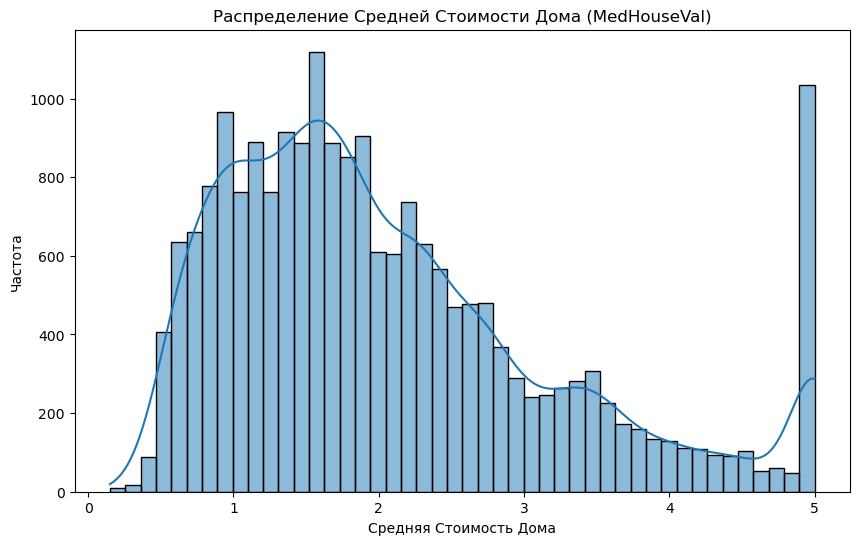

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение графика распределения
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Распределение Средней Стоимости Дома (MedHouseVal)')
plt.xlabel('Средняя Стоимость Дома')
plt.ylabel('Частота')
plt.show()

**Распределение:** Распределение средней стоимости дома не является строго нормальным и показывает некоторую асимметрию.  
  
**Выбросы:** Видны потенциальные выбросы в правой части графика, где значения средней стоимости дома существенно выше, чем у большинства данных. Эти выбросы могут оказывать значительное влияние на модель машинного обучения и могут требовать дополнительной обработки.

6. **Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.**

    a. Сделайте выводы.  
    b. Удалите признаки на основании полученных значений, выводов.  
    c. Повторите п. 3, п. 4 на измененных данных.  

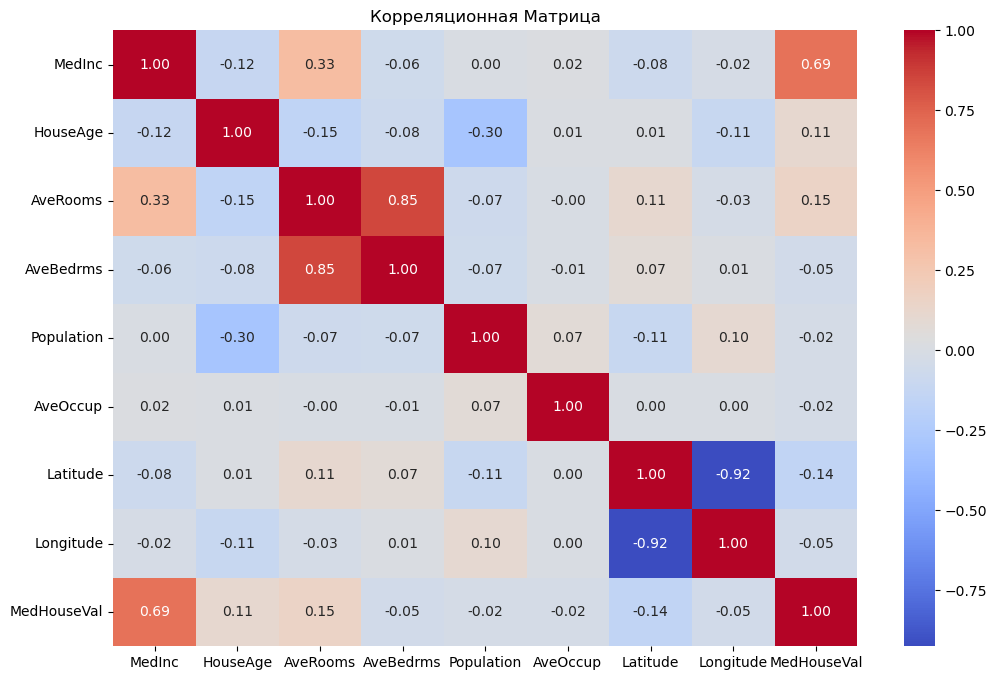

In [28]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная Матрица')
plt.show()

**Высокая Корреляция:** Некоторые признаки имеют значительную корреляцию с целевой переменной MedHouseVal. Например, MedInc (средний доход) имеет высокую положительную корреляцию.  
  
**Мультиколлинеарность:** Наличие высокой корреляции между некоторыми независимыми переменными (например, между AveRooms и AveBedrms) указывает на мультиколлинеарность, которая может негативно сказаться на производительности линейной регрессии.

In [29]:
# Удаление признака AveBedrms
df_2 = df.drop('AveBedrms', axis=1)

# Определение новых признаков и целевой переменной после удаления признака
X_2 = df_2.drop('MedHouseVal', axis=1)
y_2 = df_2['MedHouseVal']

In [30]:
# Разделение данных на обучающую (80%) и тестовую (20%) выборки после удаления признака
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии на новом наборе данных
model.fit(X_train_2, y_train_2)

LinearRegression()

In [31]:
# Предсказание на новом обучающем и тестовом множестве
y_train_pred_2 = model.predict(X_train_2)
y_test_pred_2 = model.predict(X_test_2)

# Вычисление метрик RMSE и R2 для обучающего множества
rmse_train_2 = np.sqrt(mean_squared_error(y_train_2, y_train_pred_2))
r2_train_2 = r2_score(y_train_2, y_train_pred_2)

# Вычисление метрик RMSE и R2 для тестового множества
rmse_test_2 = np.sqrt(mean_squared_error(y_test_2, y_test_pred_2))
r2_test_2 = r2_score(y_test_2, y_test_pred_2)

rmse_train_2, r2_train_2, rmse_test_2, r2_test_2

(0.7316746485880744,
 0.5995238502055928,
 0.7398151789804083,
 0.5823239094526445)

**Обучающее Множество:**  
RMSE: 0.7316  
R²: 0.5995  
  
**Тестовое Множество:**  
RMSE: 0.7398  
R²: 0.5823

**Вывод:** Удаление признака AveBedrms, который имел высокую корреляцию с другими признаками, не привело к значительному улучшению производительности модели. Это подчеркивает, что для повышения точности предсказаний может потребоваться не только удаление признаков, но и включение более сложных моделей или инженерия признаков для лучшего учета сложных взаимосвязей в данных.

7. **Исследуйте оставленные признаки на выбросы.**  
a. Удалите выбросы в случае обнаружения.  
b. Повторите п. 3, п. 4 на измененных данных.

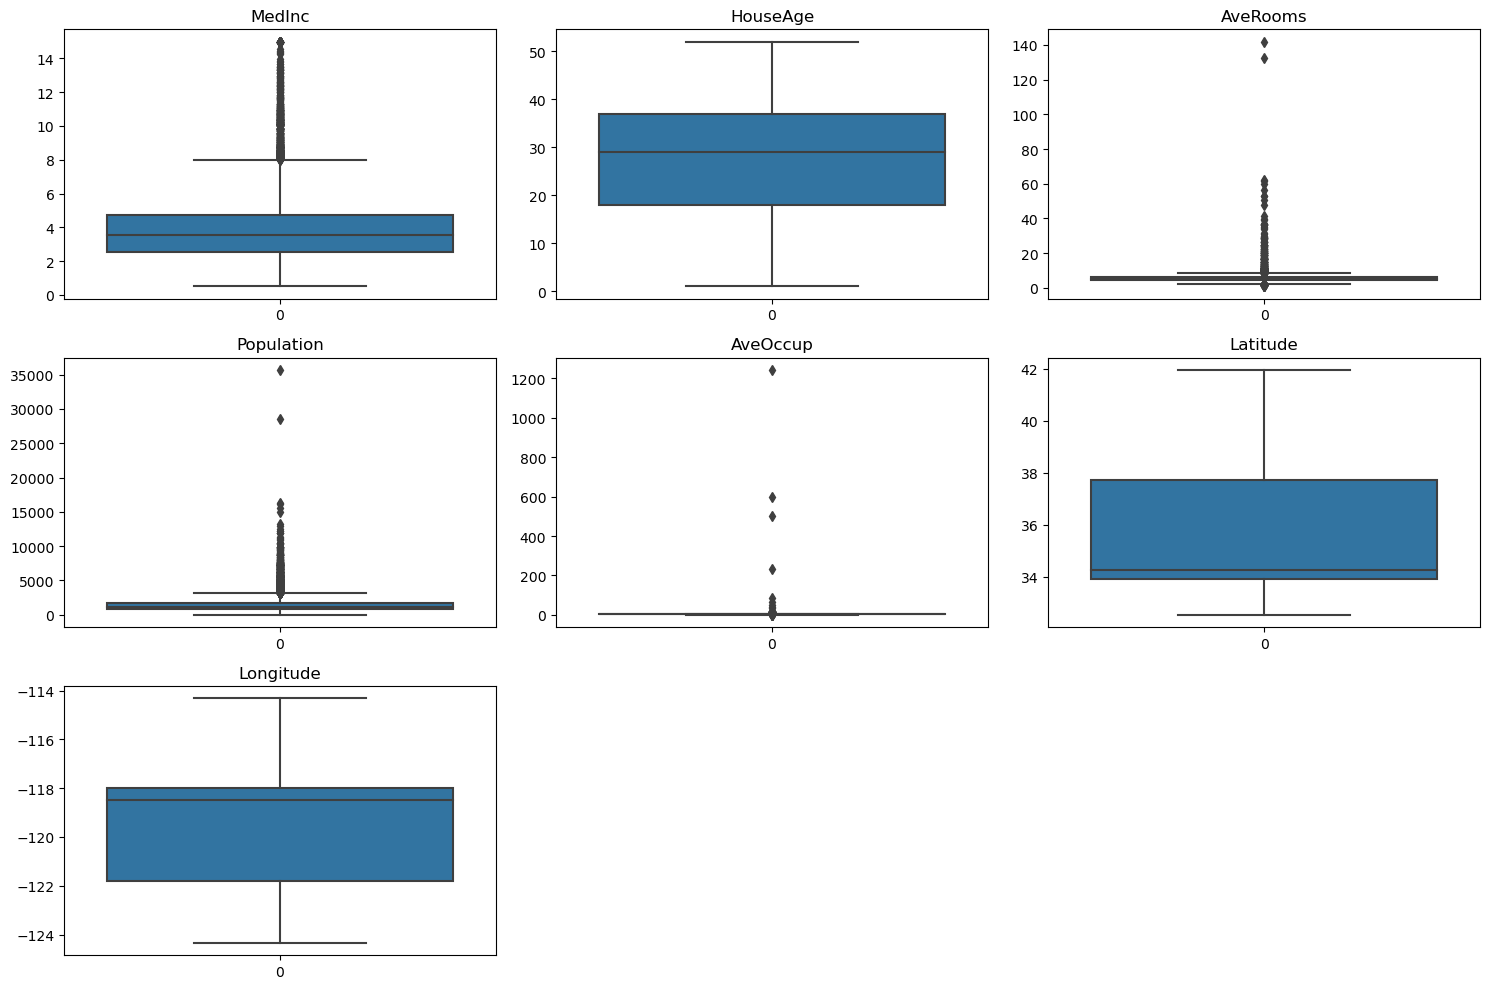

In [32]:
# Построение диаграмм для каждого признака
plt.figure(figsize=(15, 10))

# Построение отдельного графика для каждого признака
for i, column in enumerate(df_2.columns[:-1], 1): # Исключаем целевую переменную
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_2[column])
    plt.title(column)

plt.tight_layout()
plt.show()

**MedInc:** Присутствуют выбросы с высокими значениями.  
**HouseAge:** Выбросов мало или они отсутствуют.  
**AveRooms:** Значительные выбросы с высокими значениями.  
**Population:** Выбросы с очень высокими значениями населения.  
**AveOccup:** Значительные выбросы.  
**Latitude и Longitude:** Не показывают явных выбросов.

In [33]:
# Удаление выбросов для определенных признаков
for column in ['MedInc', 'AveRooms', 'Population', 'AveOccup']:
    Q1 = df_2[column].quantile(0.25)
    Q3 = df_2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_2 = df_2[(df_2[column] >= lower_bound) & (df_2[column] <= upper_bound)]

In [34]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17797 entries, 3 to 20639
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       17797 non-null  float64
 1   HouseAge     17797 non-null  float64
 2   AveRooms     17797 non-null  float64
 3   Population   17797 non-null  float64
 4   AveOccup     17797 non-null  float64
 5   Latitude     17797 non-null  float64
 6   Longitude    17797 non-null  float64
 7   MedHouseVal  17797 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB


In [36]:
# Повторное разделение на обучающую и тестовую выборки после удаления выбросов
X_3 = df_2.drop('MedHouseVal', axis=1)
y_3 = df_2['MedHouseVal']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

In [37]:
# Создание и обучение модели линейной регрессии после удаления выбросов
model.fit(X_train_3, y_train_3)

LinearRegression()

In [38]:
# Предсказание на новом обучающем и тестовом множестве
y_train_pred_3 = model.predict(X_train_3)
y_test_pred_3 = model.predict(X_test_3)

In [39]:
# Вычисление метрик RMSE и R2 для обучающего множества после удаления выбросов
rmse_train_3 = np.sqrt(mean_squared_error(y_train_3, y_train_pred_3))
r2_train_3 = r2_score(y_train_3, y_train_pred_3)

# Вычисление метрик RMSE и R2 для тестового множества после удаления выбросов
rmse_test_3 = np.sqrt(mean_squared_error(y_test_3, y_test_pred_3))
r2_test_3 = r2_score(y_test_3, y_test_pred_3)

rmse_train_3, r2_train_3, rmse_test_3, r2_test_3

(0.6610299227496499,
 0.6236572448199893,
 0.6682884986543768,
 0.6227130683101154)

**Обучающее Множество:**  
RMSE: 0.6610  
R²: 0.6236  
  
**Тестовое Множество:**  
RMSE: 0.6682  
R²: 0.6227

**Вывод:** После удаления выбросов из данных, производительность модели линейной регрессии улучшилась. RMSE Уменьшился: Это указывает на то, что средняя ошибка предсказаний модели стала меньше. Увеличение R²: Повышение коэффициента детерминации R² показывает, что модель стала лучше объяснять изменчивость данных.

8. **Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.**  
a. Повторите п. 3, п. 4 на измененных данных.

    MedInc: Применим логарифмическое преобразование, так как доходы часто распределены логнормально.
    AveRooms: Возведем в квадрат, чтобы усилить влияние большего количества комнат.
    Population: Применим квадратный корень, чтобы сгладить экстремальные значения.

In [40]:
# Применение математических преобразований к выбранным признакам
df_2['MedInc'] = np.log1p(df_2['MedInc']) # Логарифмическое преобразование
df_2['AveRooms'] = df_2['AveRooms'] ** 2 # Возведение в квадрат
df_2['Population'] = np.sqrt(df_2['Population']) # Квадратный корень

In [41]:
# Разделение данных на обучающую и тестовую выборки после преобразования признаков
X_4 = df_2.drop('MedHouseVal', axis=1)
y_4 = df_2['MedHouseVal']
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42)

In [42]:
# Создание и обучение модели линейной регрессии после преобразования признаков
model.fit(X_train_4, y_train_4)

LinearRegression()

In [43]:
# Предсказание на новом обучающем и тестовом множестве
y_train_pred_4 = model.predict(X_train_4)
y_test_pred_4 = model.predict(X_test_4)

# Вычисление метрик RMSE и R2 для обучающего множества после преобразования признаков
rmse_train_4 = np.sqrt(mean_squared_error(y_train_4, y_train_pred_4))
r2_train_4 = r2_score(y_train_4, y_train_pred_4)

# Вычисление метрик RMSE и R2 для тестового множества после преобразования признаков
rmse_test_4 = np.sqrt(mean_squared_error(y_test_4, y_test_pred_4))
r2_test_4 = r2_score(y_test_4, y_test_pred_4)

rmse_train_4, r2_train_4, rmse_test_4, r2_test_4

(0.6842272596720324, 0.5967799984904412, 0.695074397228966, 0.5918626200192019)

**Обучающее Множество:**  
RMSE: 0.6842  
R²: 0.5967  
  
**Тестовое Множество:**  
RMSE: 0.6950  
R²: 0.5918

**Вывод:** Применение математических преобразований к признакам не привело к значительному улучшению производительности модели. Это может быть связано с тем, что выбранные преобразования не существенно улучшили линейную связь между признаками и целевой переменной. RMSE: Наблюдается незначительное увеличение RMSE как на обучающей, так и на тестовой выборке по сравнению с предыдущей моделью без преобразований. R²: Коэффициент детерминации R² также немного снизился.

9. **Сформулируйте выводы по проделанной работе.**  
a. Кратко опишите какие преобразования были сделаны с данными.  
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.  
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

**Преобразования и Обработка Данных:**

    Проверка на Пропуски: Данные были проверены на наличие пропусков; пропуски отсутствовали.
    
    Разделение на Обучающую и Тестовую Выборки: Исходные данные были разделены на обучающую (80%) и тестовую (20%) выборки.
    
    Корреляционный Анализ: Выявлена мультиколлинеарность между некоторыми признаками; на основе этого анализа был удален признак AveBedrms.
    
    Удаление Выбросов: Выбросы были удалены для признаков MedInc, AveRooms, Population, AveOccup.
    
    Математические Преобразования Признаков: Применены следующие преобразования:
        MedInc: логарифмическое преобразование.
        AveRooms: возведение в квадрат.
        Population: извлечение квадратного корня.

In [44]:
# Создание DataFrame с данными для сравнения моделей
models_comparison = pd.DataFrame({
    'Модель': ['Базовая модель', 'После удаления AveBedrms', 'После удаления выбросов', 'С преобразованными признаками'],
    'RMSE (Обучающее множество)': [rmse_train, rmse_train_2, rmse_train_3, rmse_train_4],
    'R² (Обучающее множество)': [r2_train, r2_train_2, r2_train_3, r2_train_4],
    'RMSE (Тестовое множество)': [rmse_test, rmse_test_2, rmse_test_3, rmse_test_4],
    'R² (Тестовое множество)': [r2_test, r2_test_2, r2_test_3, r2_test_4],
    'Признаки и Преобразования': [
        'Все исходные признаки',
        'Исключение AveBedrms',
        'Исключение выбросов',
        'Логарифм MedInc, квадрат AveRooms, корень Population'
    ]
})

models_comparison

,Модель,RMSE (Обучающее множество),R² (Обучающее множество),RMSE (Тестовое множество),R² (Тестовое множество),Признаки и Преобразования
0,Базовая модель,0.719676,0.612551,0.745581,0.575788,Все исходные признаки
1,После удаления AveBedrms,0.731675,0.599524,0.739815,0.582324,Исключение AveBedrms
2,После удаления выбросов,0.661030,0.623657,0.668288,0.622713,Исключение выбросов
3,С преобразованными признаками,0.684227,0.596780,0.695074,0.591863,"Логарифм MedInc, квадрат AveRooms, корень Popu..."


**Вывод:** Модели линейной регрессии показали среднюю производительность в решении задачи предсказания средней стоимости дома. Наибольшее улучшение метрик наблюдалось после удаления выбросов, что подчеркивает важность предварительной очистки данных для улучшения точности модели. Математические преобразования признаков не дали значительного улучшения, что может указывать на необходимость более тщательного подбора преобразований или использования более сложных моделей, способных улавливать нелинейные зависимости в данных.